In [1]:
#Import all dependencies in this block
import ast
from graphviz import Digraph as dgph
from IPython.display import Image
import vulture
from pprint import pprint

In [2]:
#Read input code in this block 
#code = """
#def greet(name):
#   print("Hello, " +(name))
#greet("World")
#"""


#Can also read code from a file, just copy the file in UserDirectory,below code and enter the file name.
codeFileName='testcode.py'
code=""
with open(codeFileName) as file:
    code = file.read()


In [3]:
#Can print input to check everything is working properly
print(code)

import ast
from graphviz import Digraph as dgph
from IPython.display import Image
from pprint import pprint
import vulture

def addition(a,b):
    return a+b

def subtraction(a,b):
    return a-b

def difference(a,b):
    return abs(a-b)

def multiplication(a,b):
    return a*b

def division(a,b):
    return a/b

usedVariable = 10

for i in range(11):
    unusedVariable =11
    print(multiplication(i,usedVariable))
for i in range(11):
    unusedVariable =6
    print(difference(i,usedVariable))



In [4]:
#Making the abstract syntax tree(AST)
parsed_ast = ast.parse(code)

In [5]:
#We are exploring the tree 
for node in ast.walk(parsed_ast):
    print(node.__class__.__name__)

Module
Import
ImportFrom
ImportFrom
ImportFrom
Import
FunctionDef
FunctionDef
FunctionDef
FunctionDef
FunctionDef
Assign
For
For
alias
alias
alias
alias
alias
arguments
Return
arguments
Return
arguments
Return
arguments
Return
arguments
Return
Name
Constant
Name
Call
Assign
Expr
Name
Call
Assign
Expr
arg
arg
BinOp
arg
arg
BinOp
arg
arg
Call
arg
arg
BinOp
arg
arg
BinOp
Store
Store
Name
Constant
Name
Constant
Call
Store
Name
Constant
Name
Constant
Call
Name
Add
Name
Name
Sub
Name
Name
BinOp
Name
Mult
Name
Name
Div
Name
Load
Store
Name
Call
Load
Store
Name
Call
Load
Load
Load
Load
Load
Name
Sub
Name
Load
Load
Load
Load
Load
Name
Name
Name
Load
Name
Name
Name
Load
Load
Load
Load
Load
Load
Load
Load


In [6]:
# To Organize and print only the function names. 
def find_function_names(node):
    if isinstance(node, ast.FunctionDef):
        print(f"Function Name: {node.name}")


for node in ast.walk(parsed_ast):
    find_function_names(node)


Function Name: addition
Function Name: subtraction
Function Name: difference
Function Name: multiplication
Function Name: division


In [7]:
new_parsed_ast = parsed_ast

# Modify the AST
for node in ast.walk(new_parsed_ast):
    if isinstance(node, ast.FunctionDef):
        node.body.insert(0, ast.parse("print('Function Executed')").body[0])

# Compile the modified AST
modified_code = compile(new_parsed_ast, filename='', mode='exec')

exec(modified_code)

Function Executed
0
Function Executed
10
Function Executed
20
Function Executed
30
Function Executed
40
Function Executed
50
Function Executed
60
Function Executed
70
Function Executed
80
Function Executed
90
Function Executed
100
Function Executed
10
Function Executed
9
Function Executed
8
Function Executed
7
Function Executed
6
Function Executed
5
Function Executed
4
Function Executed
3
Function Executed
2
Function Executed
1
Function Executed
0


In [8]:
#Lets Dump the AST in text file to find out how the tree is represented as text
print(ast.dump(parsed_ast,indent=4))

Module(
    body=[
        Import(
            names=[
                alias(name='ast')]),
        ImportFrom(
            module='graphviz',
            names=[
                alias(name='Digraph', asname='dgph')],
            level=0),
        ImportFrom(
            module='IPython.display',
            names=[
                alias(name='Image')],
            level=0),
        ImportFrom(
            module='pprint',
            names=[
                alias(name='pprint')],
            level=0),
        Import(
            names=[
                alias(name='vulture')]),
        FunctionDef(
            name='addition',
            args=arguments(
                posonlyargs=[],
                args=[
                    arg(arg='a'),
                    arg(arg='b')],
                kwonlyargs=[],
                kw_defaults=[],
                defaults=[]),
            body=[
                Expr(
                    value=Call(
                        func=Name(id='print', c

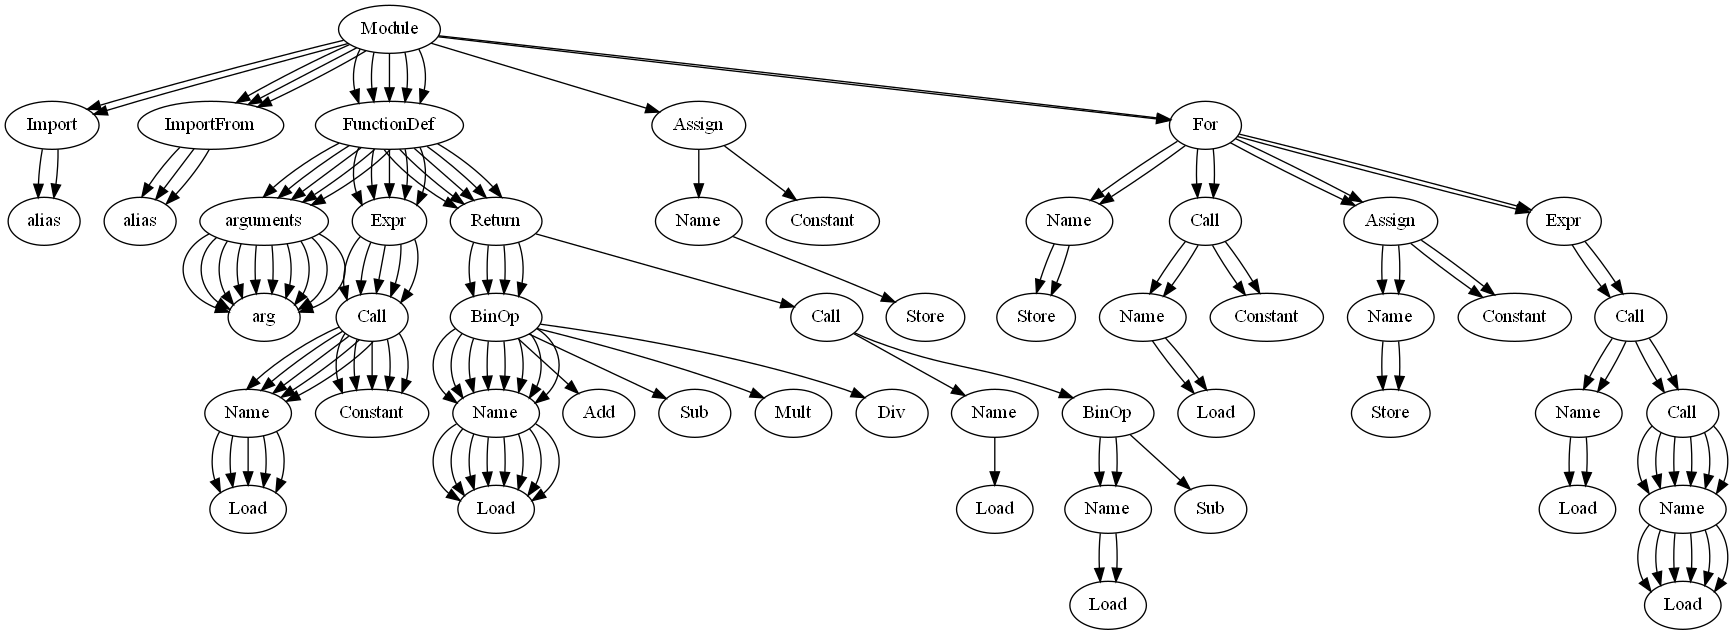

In [9]:
#A visual representation of AST
def build_ast_graph(dot, node, parent_name=""):
    current_name = parent_name +' '+ node.__class__.__name__
    dot.node(current_name, label=node.__class__.__name__)
    #print(parent_name)
    for child_node in ast.iter_child_nodes(node):
        child_name = build_ast_graph(dot, child_node, current_name)
        dot.edge(current_name, child_name)

    return current_name

# Create a directed graph
dot = dgph(comment='AST Visualization')

# Build and visualize the AST graph
build_ast_graph(dot, parsed_ast)
dot.render('ast_visualization', format='png', cleanup=True, view=True)

Image("ast_visualization.png")

In [10]:
#use the analyzer class to find the unused import libraries
class Analyzer(ast.NodeVisitor):
    def __init__(self):
        self.stats = {"import": [], "from": []}

    def visit_Import(self, node):
        for alias in node.names:
            self.stats["import"].append(alias.name)
        self.generic_visit(node)

    def visit_ImportFrom(self, node):
        for alias in node.names:
            self.stats["from"].append(alias.name)
        self.generic_visit(node)

    def report(self):
        pprint(self.stats)


In [11]:
#use the analyzer from above
analyzer = Analyzer()
analyzer.visit(parsed_ast)
analyzer.report()

{'from': ['Digraph', 'Image', 'pprint'], 'import': ['ast', 'vulture']}


In [14]:
#vulture uses AST to find out dead codes.
!vulture testcode.py

testcode.py:1: unused import 'ast' (90% confidence)
testcode.py:2: unused import 'dgph' (90% confidence)
testcode.py:3: unused import 'Image' (90% confidence)
testcode.py:4: unused import 'pprint' (90% confidence)
testcode.py:6: unused function 'addition' (60% confidence)
testcode.py:9: unused function 'subtraction' (60% confidence)
testcode.py:18: unused function 'division' (60% confidence)
testcode.py:24: unused variable 'unusedVariable' (60% confidence)
testcode.py:27: unused variable 'Variable' (60% confidence)
